<a href="https://colab.research.google.com/github/jasog01/cursomlean/blob/main/Relaci%C3%B3n_Minutos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 – Relación Minutos Ingreso

**Integrantes del Grupo:**
- Jose Sogamoso
- Andres Marin
- Blexy Granados

**Descripción del Problema:**

Analsis en clientes de telefonia donde identificaremos la relación entre el consumo de minutos y los ingresos de los clientes, ilustramos graficamente como se distribuyen los datos y que impacto tienen algunas caracteristicas adicionales en consumo.


In [ ]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv'
df = pd.read_csv(url)

In [ ]:
df.describe()

,totmou,totrev,eqpdays,Customer_ID
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,7692.804866,1042.133807,386.794500,1.049965e+06
std,8657.917883,857.144895,252.720196,2.879424e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2576.000000,526.787500,210.000000,1.025053e+06
50%,5262.000000,820.235000,338.000000,1.049652e+06
75%,9823.250000,1272.975000,522.000000,1.074798e+06
max,163264.176700,13426.600000,1823.000000,1.099992e+06


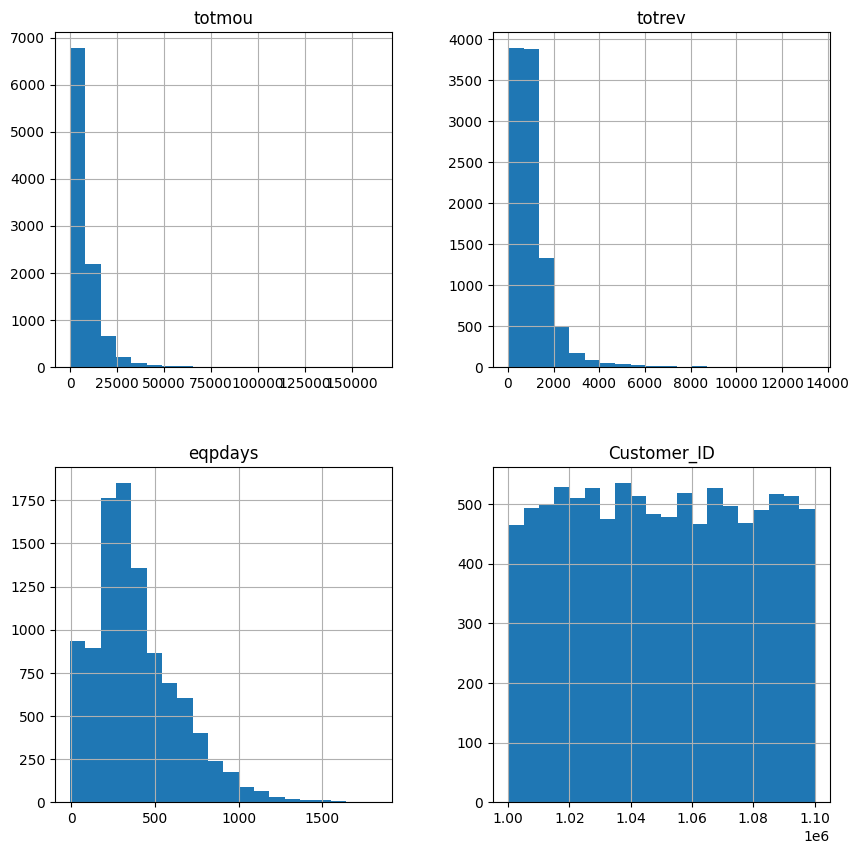

In [ ]:
df.hist(figsize=(10,10), bins = 20)
plt.show()

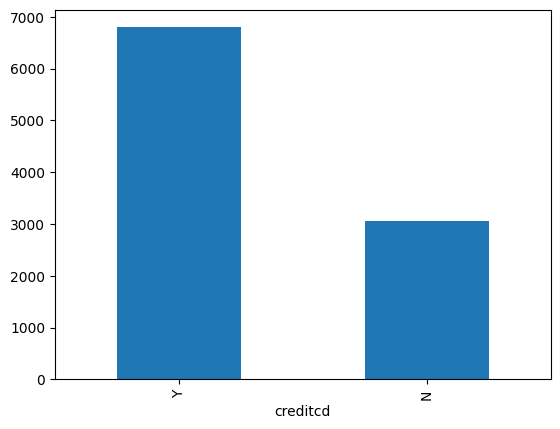

In [ ]:
df['creditcd'].value_counts().plot(kind='bar')
plt.show()

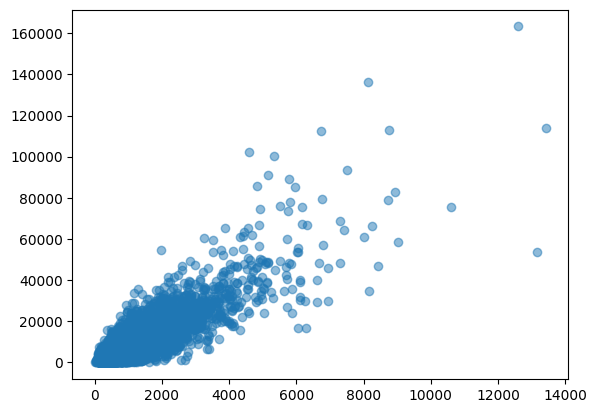

In [ ]:
plt.scatter(df['totrev'], df['totmou'], alpha=0.5)
plt.show()

Las variables totrev y totmou nos muestran una correlacion positiva fuerte, sin embargo notamos tres valores atipicos

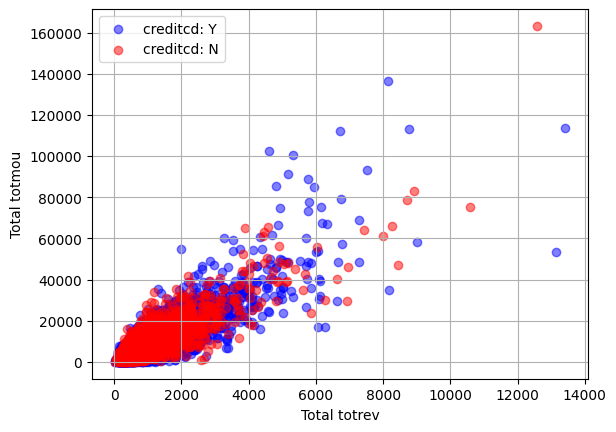

In [ ]:

# Crear un subplot
fig, ax = plt.subplots()

# Scatter plot para 'Y'
ax.scatter(df[df['creditcd'] == 'Y']['totrev'], df[df['creditcd'] == 'Y']['totmou'], color='blue', alpha=0.5, label='creditcd: Y')

# Scatter plot para 'N'
ax.scatter(df[df['creditcd'] == 'N']['totrev'], df[df['creditcd'] == 'N']['totmou'], color='red', alpha=0.5, label='creditcd: N')


# Añadir etiquetas y título
ax.set_xlabel('Total totrev')
ax.set_ylabel('Total totmou')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


La asignación de credito infiere en cierto grado en las variables dado que observamos que los clientes con credito son mas propensos a hacer mayor utilizacion de minutos e incluso son en mayor proporcion los de mas altos ingresos.

In [ ]:
#Ajustamos df para correr matrix de correlacion
replace_list = {"creditcd" : {"N": 0, "Y" : 1, "I": 2}}
df.replace(replace_list,inplace=True)

#Matrix de correlación

In [ ]:
corr_matrix = df.corr(method='pearson')
corr_matrix.style.background_gradient(cmap='coolwarm')

,totmou,totrev,creditcd,eqpdays,Customer_ID
totmou,1.000000,0.835485,-0.045701,-0.110179,-0.282310
totrev,0.835485,1.000000,0.004963,0.061617,-0.471625
creditcd,-0.045701,0.004963,1.000000,0.118590,-0.138433
eqpdays,-0.110179,0.061617,0.118590,1.000000,-0.407466
Customer_ID,-0.282310,-0.471625,-0.138433,-0.407466,1.000000


Al analizar los datos encontramos que existe una relacion fuerte entre el total de ingresos y los minutos usados, entendiendo que los valores del consumo cambian en un 80% aproximadamente dependiento el valor de los ingresos.